In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df=pd.read_csv("Classified Data",index_col=0)

In [11]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [13]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
scaler

StandardScaler()

In [17]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [18]:
scaled_features=scaler.transform(df.drop('TARGET CLASS',axis=1))
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [19]:
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df.columns[:-1]

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ'], dtype='object')

In [20]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.30)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn=KNeighborsClassifier(n_neighbors=1)

In [25]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [26]:
pred=knn.predict(x_test)
pred

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0], d

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print(confusion_matrix(y_test,pred))

[[128  16]
 [ 11 145]]


In [30]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       144
           1       0.90      0.93      0.91       156

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [31]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

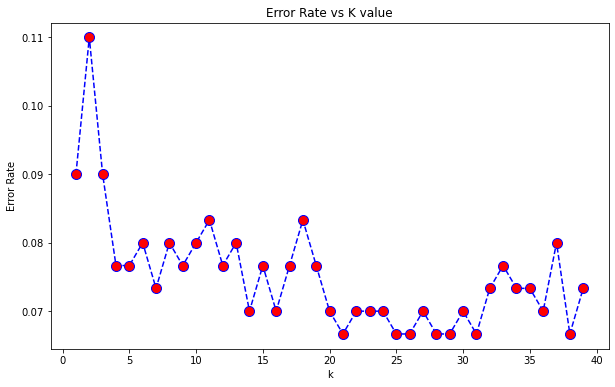

In [32]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',
         markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('k')
plt.ylabel('Error Rate')


In [31]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('with k=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

with k=1


[[126  15]
 [ 10 149]]


              precision    recall  f1-score   support

           0       0.93      0.89      0.91       141
           1       0.91      0.94      0.92       159

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [42]:
knn=KNeighborsClassifier(n_neighbors=34)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('with k=34')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

with k=34


[[134   7]
 [  7 152]]


              precision    recall  f1-score   support

           0       0.95      0.95      0.95       141
           1       0.96      0.96      0.96       159

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [36]:
from sklearn.model_selection import cross_val_score

In [41]:
neighbors=list(range(1,50,2))
cv_scores=[]
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x_train,y_train,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())
cv_scores

[0.8985714285714288,
 0.9185714285714287,
 0.9171428571428573,
 0.9242857142857144,
 0.9285714285714286,
 0.9314285714285715,
 0.9342857142857144,
 0.9314285714285715,
 0.9271428571428573,
 0.9342857142857144,
 0.9328571428571429,
 0.9371428571428572,
 0.9385714285714286,
 0.9342857142857144,
 0.9357142857142857,
 0.9414285714285715,
 0.9400000000000001,
 0.9385714285714286,
 0.9357142857142857,
 0.9385714285714286,
 0.9371428571428572,
 0.9357142857142857,
 0.9357142857142857,
 0.9371428571428572,
 0.9357142857142857]